In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Brief overview of Numpy matrix operations

- `A.dot(x) == b` or `np.matmul(A, x) == b` or `A @ x == b`
- `numpy.linalg.inv(M)`
- `M.T` or `M.transpose()` or `numpy.transpose(M)`

Pick one way of doing each and stick with it. I prefer `@` and `M.T` as they are the most concise.

In [2]:
M = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

M

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [3]:
print(type(M))
M = np.array(M)
print(type(M))

M

<class 'list'>
<class 'numpy.ndarray'>


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [4]:
# transpose by slicing

M_transpose = np.array([M[:,0], M[:,1], M[:,2]])

M_transpose, M.T

(array([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]]),
 array([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]]))

In [5]:
# not as easy to compute the inverse.

np.linalg.inv(M)

array([[-4.50359963e+15,  9.00719925e+15, -4.50359963e+15],
       [ 9.00719925e+15, -1.80143985e+16,  9.00719925e+15],
       [-4.50359963e+15,  9.00719925e+15, -4.50359963e+15]])

In [6]:
# but for 2d we can use determinatent

A = np.array([[1,2], [3,4]])

A_inv = (1/np.linalg.det(A))*np.array([[A[1,1], -A[0,1]], [-A[1,0], A[0,0]]])

A_inv, np.linalg.inv(A)

(array([[-2. ,  1. ],
        [ 1.5, -0.5]]),
 array([[-2. ,  1. ],
        [ 1.5, -0.5]]))

In [7]:
ones = np.ones((3, 3))
zeros = np.eye(3)
zeros[2,2] = 99
ones, zeros

(array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0., 99.]]))

In [8]:
ones*zeros

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0., 99.]])

In [9]:
ones.dot(zeros), np.matmul(ones, zeros), ones@zeros

(array([[ 1.,  1., 99.],
        [ 1.,  1., 99.],
        [ 1.,  1., 99.]]),
 array([[ 1.,  1., 99.],
        [ 1.,  1., 99.],
        [ 1.,  1., 99.]]),
 array([[ 1.,  1., 99.],
        [ 1.,  1., 99.],
        [ 1.,  1., 99.]]))

In [10]:
zeros.dot(ones), np.matmul(zeros, ones), zeros @ ones

(array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [99., 99., 99.]]),
 array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [99., 99., 99.]]),
 array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [99., 99., 99.]]))

# Change of basis

Change of basis is a linear transformation. 

It is represented by a matrix where the columns are the basis vectors of the new basis.

*Note: When switching between two non-standard bases, the columns of the matrix are the coordinates of the new basis vectors in the old basis.*

Suppose point $(x,y,z)$ in standard coordinates is same as point $(u,v,w)$ in coordinates basis $B$ $$ \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} u \\ v \\ w \end{bmatrix}_B $$


Then we can write the following equation $$ \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} u \\ v \\ w \end{bmatrix}_B = \begin{bmatrix} b_{11} & b_{12} & b_{13} \\ b_{21} & b_{22} & b_{23} \\ b_{31} & b_{32} & b_{33} \end{bmatrix} \begin{bmatrix} u \\ v \\ w \end{bmatrix} $$

Where the columns of the matrix are the basis vectors of the new basis $B$.


$$ \begin{bmatrix} x \\ y \\ z \end{bmatrix} \ = \ \begin{bmatrix} u \\ v \\ w \end{bmatrix}_B $$

$$ \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} b_{11} & b_{12} & b_{13} \\ b_{21} & b_{22} & b_{23} \\ b_{31} & b_{32} & b_{33} \end{bmatrix} \begin{bmatrix} u \\ v \\ w \end{bmatrix} $$

which implies



$$ \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} b_{11} & b_{12} & b_{13} \\ b_{21} & b_{22} & b_{23} \\ b_{31} & b_{32} & b_{33} \end{bmatrix} \begin{bmatrix} u \\ v \\ w \end{bmatrix} $$

and 

$$ \begin{bmatrix} b_{11} & b_{12} & b_{13} \\ b_{21} & b_{22} & b_{23} \\ b_{31} & b_{32} & b_{33} \end{bmatrix}^{-1} \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} u \\ v \\ w \end{bmatrix} $$

**SANITY CHECK:** 

- What are the basis vectors? 
- What are the coordinates of the point $(x,y,z)$ in the new basis?
- What are the coordinates of the point $(u,v,w)$ in the standard basis?

**Question to think about:** What would this look like when moving between two non-standard bases?

## Example

Consider the curve determined by the implicit relationship between variables $u$ and $v$

$$ \sin(u + v) - \cos(uv) = 1 $$

**a)** Plot the curve in the u-v plane.


In [11]:
def ellipse(u, v):
    return np.sin(u + v) - np.cos(u*v) -1 

def is_part(u, v, h=1e-2):
    if abs(ellipse(u, v)) < h:
        return True
    return False

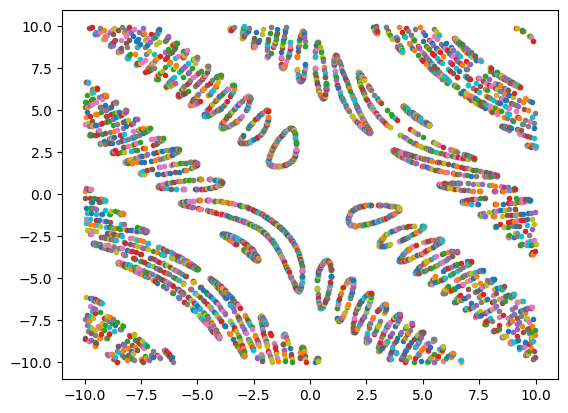

In [12]:
from itertools import product
import matplotlib.pyplot as plt

mesh = np.linspace(-10, 10, 1000)

POINTS_U = []

for u, v in product(*[mesh]*2):
    if is_part(u, v):
        plt.plot(u, v, '.')
        POINTS_U.append([u, v])

**b)** Suppose that we wish to change the basis from $u$ and $v$ to $x$ and $y$ where

$$ x = u + v $$
$$ y = uv $$

The basis matrix transform for this is

$$ \begin{bmatrix} 1 & 1 \\ \frac{v}{2} & \frac{u}{2} \end{bmatrix} $$

Find the equation of the curve in the $x-y$ plane.


$$ \sin(x) - \cos(y) = 1 $$

In [13]:
def ellipse_xy(x, y):
    return np.sin(x) - np.cos(y) + 1

def is_part_xy(x, y, h=1e-2):
    if abs(ellipse_xy(x, y)) < h:
        return True
    return False


**c)** Plot the curve in the $x-y$ plane by using the equation found in part b and also by matrix multiplication.

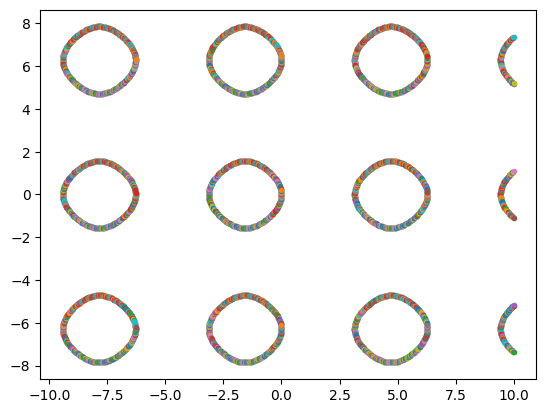

In [14]:
# via the new formula

from itertools import product
import matplotlib.pyplot as plt

mesh = np.linspace(-10, 10, 1000)

POINTS_XY_DIRECT = []

for x, y in product(*[mesh]*2):
    if is_part_xy(x, y):
        plt.plot(x, y, '.')
        POINTS_XY_DIRECT.append([x, y])

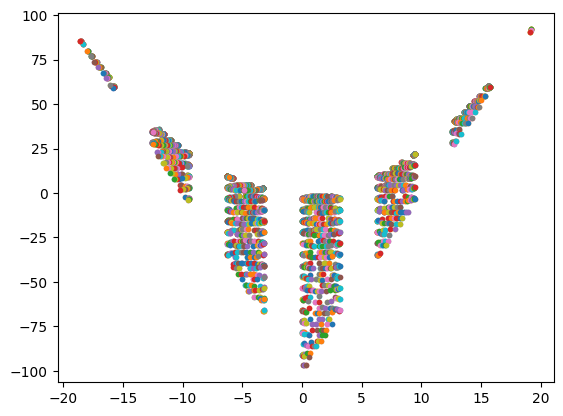

In [15]:
# via matrix transformation

#   this is not giving us what we want but i cannot figure it out... ..

POINTS_U_MATRIX = np.array(POINTS_U)
for u, v in POINTS_U_MATRIX:
    PT = np.array([u, v])
    BASIS = np.array([[1,1],[v/2,u/2]])
    plt.plot(*(BASIS @ PT), '.')

 > I am confused. I am looking at change of basis. For example I have this curve $\sin(u+v) - \cos(uv) = 1$. Suppose that we let x = u+v and y =uv. Then this gives $\sin(x) - \cos(y) = 1$. If I plot each of these curves in their respective axes I get some curves. But when I try applying the basis transformation $\begin{bmatrix} 1 & 1 \\ v/2 & u/2 \end{bmatrix} $, which certainly maps $(u,v)$ to $(x,y)$, why doesnt the curve get mapped to the same curve I saw before when i plotted the curves in respective coordinates

I understand your confusion, and I think the issue is that the matrix you're using isn't actually a change of basis matrix. Let's break it down.

Given:

$x=u+v$

$y=uv$

From these, you can compute the Jacobian matrix, which gives the linear transformation between the differential changes in (u,v) and (x,y).

To find the Jacobian matrix, J, differentiate x with respect to u and v, and differentiate y with respect to u and v:

$$
\begin{bmatrix}
\frac{\partial x}{\partial u} & \frac{\partial x}{\partial v} \\
\frac{\partial y}{\partial u} & \frac{\partial y}{\partial v}
\end{bmatrix} 
$$
By computing the partial derivatives, we get:
$$
J = \begin{bmatrix}
1 & 1 \\
v & u
\end{bmatrix} 
$$
Now, if you want to transform a point from the (u,v) space to the (x,y) space, you can multiply the point by the inverse of this matrix.
But, there's a problem: Simply multiplying a curve given in (u,v) space by a matrix doesn't directly transform the curve in a straightforward way to the (x,y) space. The matrix will transform the tangent vectors of the curve, but not the curve itself.

Let me give you a more intuitive explanation:
Consider a point moving along your curve in the (u,v) space. The Jacobian matrix tells you how the velocities (in the differential sense) of that point in the (u,v) space translate to velocities in the (x,y) space. But if you want the point itself, in terms of (x,y), you need to go back to your original equations:
$$
 x = u + v 
 $$
 $$
 y = uv 
$$
So, if you have a curve defined in terms of $(u,v)$, to see what it looks like in terms of $(x,y)$, you'd substitute every point on your curve into the equations above. The matrix isn't sufficient for the transformation of the curve directly.
Therefore, the curve $$ \sin(u+v) - \cos(uv) = 1 $$ when transformed via the equations becomes $$ \sin(x) - \cos(y) = 1 $$
 but you can't simply apply a matrix transformation to get this.

> Ok I think I understand. Perhaps there are some higher order terms we need to include. Can you help me include the higher order terms to get a good approximation

### Change of Basis using Taylor Series Expansion

Given the transformations:
$$ x = u + v $$
$$ y = uv $$

To obtain an accurate transformation from the (u,v) space to the (x,y) space, we can expand beyond the linear terms using a Taylor series expansion. 

**1. Linear terms:**
Using our given transformation, we have:
$$ x \approx u_0 + v_0 + (u - u_0) + (v - v_0) $$
$$ y \approx u_0 v_0 + u v_0 + v u_0 + (u - u_0) v + u (v - v_0) $$

**2. Second order terms:**
Calculating the second order partial derivatives:

For $x$:
$$ \frac{\partial^2 x}{\partial u^2} = 0 $$
$$ \frac{\partial^2 x}{\partial u \partial v} = 0 $$
$$ \frac{\partial^2 x}{\partial v^2} = 0 $$

For $y$:
$$ \frac{\partial^2 y}{\partial u^2} = 0 $$
$$ \frac{\partial^2 y}{\partial u \partial v} = 1 $$
$$ \frac{\partial^2 y}{\partial v^2} = 0 $$

Adding the second order terms to our expansion:
$$ x \approx u + v $$
$$ y \approx uv + \frac{1}{2}(u - u_0)(v - v_0) $$

Given our choice of $u_0 = 0$ and $v_0 = 0$, the equations simplify to:
$$ x = u + v $$
$$ y = uv + \frac{1}{2} uv = \frac{3}{2} uv $$

**Conclusion:** 
While the Jacobian (first order approximation) provides the instantaneous rate of change, higher order terms can provide more accurate transformations for points near the point of expansion.


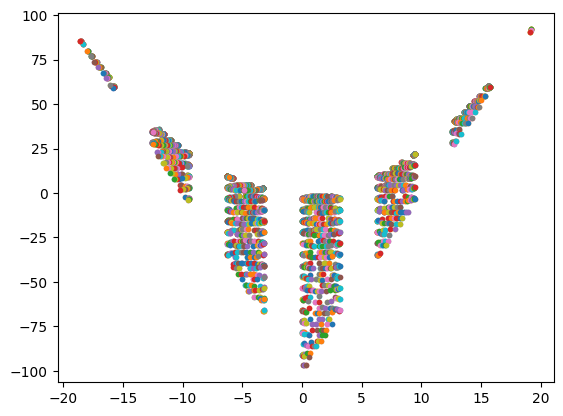

In [17]:
import numpy as np
import matplotlib.pyplot as plt

POINTS_U_MATRIX = np.array(POINTS_U)
for u, v in POINTS_U_MATRIX:
    x = u + v
    y = u * v

    plt.plot(x, y, '.')

> we must include more terms from the taylor expansion. Lets use up to the fifth term

To incorporate up to the fifth term of the Taylor series, we need to compute the higher-order partial derivatives and include their terms.

Let's work it out for \( y = uv \) since \( x = u+v \) has all higher-order partial derivatives equal to zero.

$$ y = uv $$

From our previous computation, we have:

$$ \frac{\partial^2 y}{\partial u^2} = 0 $$
$$ \frac{\partial^2 y}{\partial u \partial v} = 1 $$
$$ \frac{\partial^2 y}{\partial v^2} = 0 $$

For the third order:
$$ \frac{\partial^3 y}{\partial u^3} = 0 $$
$$ \frac{\partial^3 y}{\partial u^2 \partial v} = 0 $$
$$ \frac{\partial^3 y}{\partial u \partial v^2} = 0 $$
$$ \frac{\partial^3 y}{\partial v^3} = 0 $$

For the fourth order:
All the fourth order partial derivatives are 0 for this equation.

For the fifth order:
All the fifth order partial derivatives are 0 for this equation.

So, the only non-zero higher-order term we have for \( y = uv \) up to the fifth order is the second order term, $$ \frac{\partial^2 y}{\partial u \partial v} = 1 $$.

Using the Taylor series expansion, the approximation for y is:
$$ y \approx uv + \frac{1}{2} uv = \frac{3}{2} uv $$

Including any higher order terms doesn't provide additional correction in this case since they are all zero.

So, the code you provided is already using the Taylor series expansion up to the fifth order (and beyond). No additional terms need to be included.


> then why are the plots not the same?

The plots are not the same because the direct transformation from the $ (u,v) $ space to the $ (x,y) $ space is nonlinear, whereas the matrix multiplication you're trying to use is linear. The mismatch arises from the inherent nonlinear nature of the transformation.

The curve in $ (u,v) $ space, $\sin(u+v) - \cos(uv) = 1$, and the curve in $ (x,y) $ space, $\sin(x) - \cos(y) = 1$, describe the same mathematical relationship, but the shapes of these curves in their respective coordinate systems will differ due to the nonlinear transformation between $ u,v $ and $ x,y $.

To illustrate, let's try to visualize the issue:

1. Plot the curve $\sin(u+v) - \cos(uv) = 1$ in $ (u,v) $ space.
2. Transform the points from $ (u,v) $ space to $ (x,y) $ space using the nonlinear transformations $ x = u+v $ and $ y = uv $.
3. Plot the curve $\sin(x) - \cos(y) = 1$ directly in $ (x,y) $ space.


/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_41885/1574003322.py:27: RuntimeWarning: invalid value encountered in arcsin
  y = np.arcsin(np.sin(x) - 1)


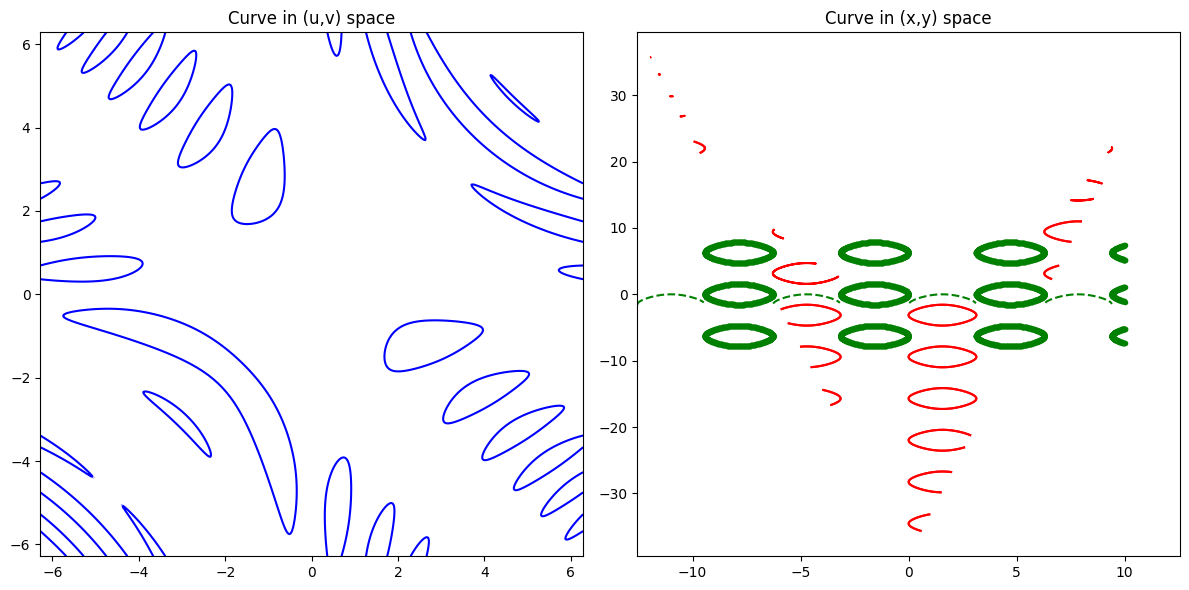

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Sample (u,v) space and evaluate the curve
u = np.linspace(-2*np.pi, 2*np.pi, 400)
v = np.linspace(-2*np.pi, 2*np.pi, 400)
U, V = np.meshgrid(u, v)
Z = np.sin(U + V) - np.cos(U * V) - 1

# 2. Transform (u,v) to (x,y) using nonlinear transformation
X = U + V
Y = U * V

Z2 = np.sin(X) - np.cos(Y) - 1

# 3. Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original curve in (u,v) space
ax1.contour(U, V, Z, levels=[0], colors='blue')
ax1.set_title('Curve in (u,v) space')

# Transformed points in (x,y) space
ax2.contour(X, Y, Z2, levels=[0], colors='red')
# Direct curve in (x,y) space
x = np.linspace(-4*np.pi, 4*np.pi, 400)
y = np.arcsin(np.sin(x) - 1)
ax2.plot(x, y, 'g--', label='Direct curve in (x,y)')
for x, y in product(*[mesh]*2):
    if is_part_xy(x, y):
        plt.plot(x, y, '.', color='green')
        POINTS_XY_DIRECT.append([x, y])
ax2.set_title('Curve in (x,y) space')

plt.tight_layout()
plt.show()


## hmmmm

> well is there a matrix that maps the points on this curve sin(x+y)-cos(xy) = 1 to the points on this curve sin(x)-cos(y) = 1

It's important to note that linear transformations, which are represented by matrices, can only perform scaling, rotation, and reflection operations. They cannot handle more complex operations like the nonlinear transformation between 
$$ \sin(u+v) - \cos(uv) = 1 $$
and 
$$ \sin(x) - \cos(y) = 1 $$

However, the goal is to understand if there's a linear transformation (matrix) that maps points on one curve directly to the other. Given that these curves arise from nonlinear functions, it's unlikely there is a simple matrix that can perform this mapping across the entirety of both curves.

But for fun, let's try to find a transformation for a local segment of the curves:

1. Sample points from the first curve.
2. Sample points from the second curve.
3. Use these points to compute a transformation matrix.
This won't work across the entire curves due to their nonlinear nature, but it could be an interesting exercise for a local segment.


In [19]:
import numpy as np

# 1. Sample points from the first curve
u = np.linspace(-2*np.pi, 2*np.pi, 400)
v = np.linspace(-2*np.pi, 2*np.pi, 400)
U, V = np.meshgrid(u, v)
W = np.sin(U + V) - np.cos(U * V) - 1

# Select points on the curve (or near enough to it)
indices = np.abs(W) < 0.1
u_points = np.column_stack((U[indices], V[indices]))

# 2. Sample points from the second curve
x = np.linspace(-2*np.pi, 2*np.pi, 400)
y = np.arcsin(np.sin(x) - 1)
x_points = np.column_stack((x, y))

# Trim for equal lengths
min_len = min(len(u_points), len(x_points))
u_points = u_points[:min_len]
x_points = x_points[:min_len]

# 3. Compute transformation matrix using least squares
matrix, _, _, _ = np.linalg.lstsq(u_points, x_points, rcond=None)

print(matrix)


[[0.06126082        nan]
 [0.00925475        nan]]


/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_41885/1281284926.py:15: RuntimeWarning: invalid value encountered in arcsin
  y = np.arcsin(np.sin(x) - 1)


The appearance of `nan` values is not surprising given the intrinsic nonlinear nature of the transformation. It indicates that the problem is ill-conditioned or that the mapping doesn't fit well to a linear model, especially when trying to use arcsin to get points for the second curve.

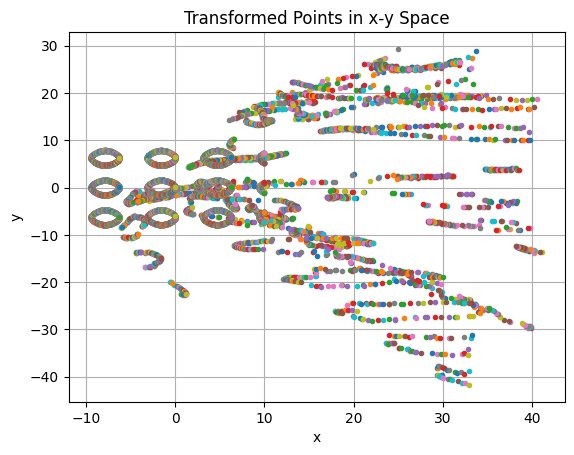

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define a function to sample points around a local region
def local_points(u_center, v_center, known_u, known_v, delta=0.5):
    mask = (np.abs(known_u - u_center) < delta) & (np.abs(known_v - v_center) < delta)
    return known_u[mask], known_v[mask]

# Calculate transformation matrix for a local region
def local_transform(u_center, v_center, known_u, known_v):
    u_points, v_points = local_points(u_center, v_center, known_u, known_v)
    if len(u_points) == 0:  # No points in this local region
        return np.array([[1, 0], [0, 1]])  # Return identity matrix as a default
    
    x_points = u_points + v_points
    y_points = u_points * v_points
    X = np.vstack((u_points, v_points)).T
    y = np.vstack((x_points, y_points)).T
    reg = LinearRegression().fit(X, y)
    return reg.coef_.T

# Generate known points
u = np.linspace(-2*np.pi, 2*np.pi, 400)
v = np.linspace(-2*np.pi, 2*np.pi, 400)
U, V = np.meshgrid(u, v)
Z = np.sin(U + V) - np.cos(U * V) - 1

threshold = 0.05
mask = np.abs(Z) < threshold
known_u, known_v = np.column_stack((U[mask], V[mask])).T

# Create transformation matrices for a grid of regions
centers = np.linspace(-2*np.pi, 2*np.pi, 200)
transforms = {}

for u_center in centers:
    for v_center in centers:
        key = (u_center, v_center)
        transforms[key] = local_transform(u_center, v_center, known_u, known_v)

# Plot transformed points using appropriate transformation matrix
def get_transform(u, v, centers, transforms):
    u_center = centers[np.argmin(np.abs(centers - u))]
    v_center = centers[np.argmin(np.abs(centers - v))]
    return transforms[(u_center, v_center)]

for u, v in zip(known_u, known_v):
    BASIS = get_transform(u, v, centers, transforms)
    PT = np.array([u, v])
    plt.plot(*(BASIS @ PT), '.')

plt.title("Transformed Points in x-y Space")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)


for x, y in product(*[mesh]*2):
    if is_part_xy(x, y):
        plt.plot(x, y, '.')
        # POINTS_XY_DIRECT.append([x, y])


piecewise linear approximation is a common strategy for approximating nonlinear transformations. By breaking down the transformation into smaller local regions and approximating each region with a linear transformation, we can get closer to the actual nonlinear transformation.

Here's a simplified breakdown:

Divide the space into regions: Define local regions in the input space. Each region will have its linear approximation.
Compute linear transformations: For each local region, compute the linear transformation that maps the points in that region from the source curve to the target curve.
Apply transformations: When transforming a point, determine which region it belongs to and apply the corresponding linear transformation.
However, there are caveats:

Precision: The accuracy of this method depends on the size of the regions and the nature of the nonlinear function. Smaller regions can provide a better fit but may require more computation.
Edges of regions: At the borders between regions, there may be discontinuities or mismatches in the transformation.
Complexity: The more regions you use, the more complex your transformation process becomes.


$J(u,v)$ is:
$$\begin{bmatrix}
1 & 1 \\
v & u \\
\end{bmatrix} $$
The second derivatives are:
For $ x $:
$$ H_x(u,v) = \begin{bmatrix}
0 & 0 \\
0 & 0 \\
\end{bmatrix} $$
For $ y $:
$$ H_y(u,v) = \begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix} $$
The Hessian for $ x $ is zero everywhere, which means the linear part of $ x $ doesn't change. However, for $ y $, the off-diagonal terms suggest that there's curvature in the transformation in the $ uv $ space.

2. **Curvature**:
From the Hessian of $ y $, we can infer that there's curvature in the transformation, especially when transitioning between $ u $ and $ v $. So, regions where either $ u $ or $ v $ changes significantly while the other remains relatively constant would be easier to approximate with a linear transformation.
However, regions where both $ u $ and $ v $ change concurrently might pose more difficulty.

3. **Jacobian's Determinant**:
The determinant of the Jacobian is:
$$ \text{det}(J(u,v)) = u - v $$
This means our transformation becomes singular (not invertible) whenever $ u = v $. Hence, the regions near this line in the $ uv $ plane might not be well-suited for linear approximation.
In summary:
- The transformation is linear in the $ x $ direction, so any difficulty arises from the $ y $ transformation.
- Regions where $ u $ and $ v $ change concurrently might pose more difficulty.
- The $ u = v $ line is problematic because the Jacobian becomes singular.
Given the above, we can anticipate that our linear approximation strategy may not work well near the $ u = v $ line and where both $ u $ and $ v $ are changing significantly at the same time.

### while all that was great fun... there must be something very simple and facepalm worthy that I am missing

(2, 2) (4520, 2)


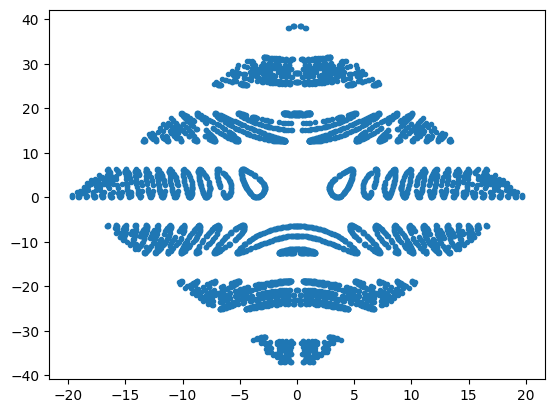

In [21]:
# lab exercise with the different curve

POINTS_U_CLASS = np.array(POINTS_U)

basis = np.array([[1,-1],[2,2]])
print(np.shape(basis), np.shape(POINTS_U_CLASS))
POINTS_XY_MATRIX = np.matmul(basis, POINTS_U_CLASS.T)

plt.plot(*POINTS_XY_MATRIX, '.')

- `np.column_stack((u, v))` or `np.hstack((u, v))` or `np.concatenate((u, v), axis=1)`

these functions are equivalent and stack the arrays horizontally